<a href="https://colab.research.google.com/github/us/addons/blob/add-adamw-tutorial/optimizers_adamw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Optimizers: AdamW
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/optimizers_adamw"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/optimizers_adamw.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/optimizers_adamw.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/optimizers_adamw.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview
This notebook will demonstrate how to use the AdamW function in TensorFlow Addons and compares with Adam optimizer on **CIFAR10 dataset**.

**Resources**:

- [Decoupled Weight Decay Regularization (AdamW Paper)](https://arxiv.org/abs/1711.05101)

- [AdamW and Super-convergence is now the fastest way to train neural nets
](https://www.fast.ai/2018/07/02/adam-weight-decay/#implementing-adamw)

- [What’s up with Deep Learning optimizers since Adam?](https://medium.com/vitalify-asia/whats-up-with-deep-learning-optimizers-since-adam-5c1d862b9db0)


## AdamW
AdamW is a optimizer that implements the Adam algorithm with weight decay and it's described in ["Decoupled
Weight Decay Regularization"](https://arxiv.org/abs/1711.05101) by Loshchilov & Hutter.

This paper points out that all the popular Deep Learning frameworks (Tensorflow, Pytorch) have implemented Adam with weight decay wrong when the paper published. (Now they are corrected.) They made the following observations:
- L2 regularization and weight decay is not the same.
- L2 regularization is not effective in Adam.
- Weight decay is equally effective in both Adam and SGD.

- In SGD, L2 regularization and weight decay can be made equivalent by reparameterization trick.
- Popular libraries implement weight decay as L2 regularization for both SGD and Adam.
- They propose AdamW and SGDW that decouple weight decay and L2 regularization steps.

# ![Adam vs AdamW](https://i.imgur.com/VkJtUyNl.png)

### Import TensorFlow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
import tensorflow_addons as tfa

## Load CIFAR10 Data

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Compile and train the model with Adam

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=150, 
                    validation_data=(test_images, test_labels))

## Compile and train the model with AdamW

In [0]:
model_w = models.Sequential()
model_w.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_w.add(layers.MaxPooling2D((2, 2)))
model_w.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_w.add(layers.MaxPooling2D((2, 2)))
model_w.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_w.add(layers.MaxPooling2D((2, 2)))
model_w.add(layers.Dropout(0.5))
model_w.add(layers.Flatten())
model_w.add(layers.Dense(64, activation='relu'))
model_w.add(layers.Dropout(0.4))
model_w.add(layers.Dense(10))

model_w.compile(optimizer=tfa.optimizers.AdamW(weight_decay=1e-5,amsgrad=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_w = model_w.fit(train_images, train_labels, epochs=150, 
                    validation_data=(test_images, test_labels))

## Compare Optimizers

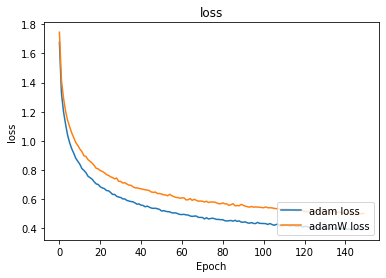

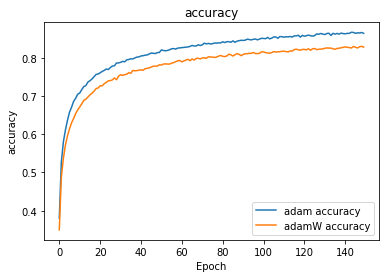

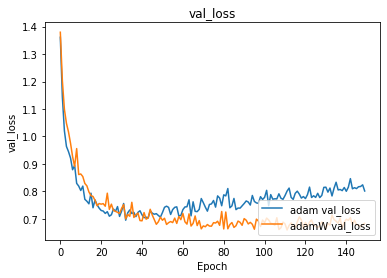

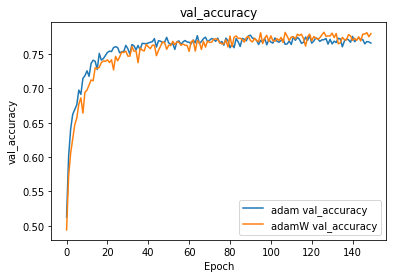

In [7]:
def compare_histories(adam_history, adamW_history, key):
  plt.title(key)
  plt.plot(adam_history.history[key], label="adam {}".format(key) )
  plt.plot(adamW_history.history[key], label="adamW {}".format(key) )
  plt.xlabel('Epoch')
  plt.ylabel(key)
  plt.legend(loc='lower right')
  plt.show()

for key in history.history.keys():
  compare_histories(history, history_w, key)


In [8]:
adam_test_loss, adam_test_acc = model.evaluate(test_images,  test_labels, verbose=2)
adam_w_test_loss, adam_w_test_acc = model_w.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.8015 - accuracy: 0.7658
10000/10000 - 1s - loss: 0.6838 - accuracy: 0.7796


In [9]:
print('adam test loss =  ', adam_test_loss)
print('adamW test loss = ', adam_w_test_loss)
print()
print('adam test accuracy =  ', adam_test_acc)
print('adamW test accuracy = ', adam_w_test_acc)

adam test loss =   0.8015134556770325
adamW test loss =  0.6838143852710724

adam test accuracy =   0.7658
adamW test accuracy =  0.7796
